# Animal Detection - Detect Favorite Animal on a Picture using Deep Learning

In this notebook we will train a NN algorithm to detect an animal on a given picture. If the animal is present, the output should be the picture with the framed animal on it.

## Part I - Dataset

### A. Data Description

I chose the [African Wildlife](https://www.kaggle.com/datasets/biancaferreira/african-wildlife) dataset for this project and more especially the elephant subfolder. However, these images are too perfect as they all have elephants.

So here is what I've done:
- add all images from the rhino folder and renamed them as "rhino_X"
- executed the below function to automatically generate empty text files corresponding to the "rhino_X" picture.
- each text files is either empty or containing line(s) as follow:

1 0.630288 0.636719 0.736041 0.726562

Corresponding to:

{ 'class_id': 1, 'x_center': 0.630288, 'y_center': 0.636719, 'width': 0.736041, 'height': 0.726562 }

If there is more than one elephant on the picture, then the text file will have multiple lines.


Below is the code step by step if you would like to reproduce in local:

In [1]:
# STEP 1
# function to rename rhino images

import os
import shutil

def rename_images(folder_path, prefix="rhino"):
    image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
    image_files.sort()

    for index, image_file in enumerate(image_files):
        new_name = f"{prefix}_{index + 1:02}.jpg"
        old_file_path = os.path.join(folder_path, image_file)
        new_file_path = os.path.join(folder_path, new_name)
        os.rename(old_file_path, new_file_path)

        print(f"Renamed: {image_file} to {new_name}")

folder_path = './archive/rhino'
rename_images(folder_path)

Renamed: 001.jpg to rhino_01.jpg
Renamed: 002.jpg to rhino_02.jpg
Renamed: 003.jpg to rhino_03.jpg
Renamed: 004.jpg to rhino_04.jpg
Renamed: 005.jpg to rhino_05.jpg
Renamed: 006.jpg to rhino_06.jpg
Renamed: 007.jpg to rhino_07.jpg
Renamed: 008.jpg to rhino_08.jpg
Renamed: 009.jpg to rhino_09.jpg
Renamed: 010.jpg to rhino_10.jpg
Renamed: 011.jpg to rhino_11.jpg
Renamed: 012.jpg to rhino_12.jpg
Renamed: 013.jpg to rhino_13.jpg
Renamed: 014.jpg to rhino_14.jpg
Renamed: 015.jpg to rhino_15.jpg
Renamed: 016.jpg to rhino_16.jpg
Renamed: 017.jpg to rhino_17.jpg
Renamed: 018.jpg to rhino_18.jpg
Renamed: 019.jpg to rhino_19.jpg
Renamed: 020.jpg to rhino_20.jpg
Renamed: 021.jpg to rhino_21.jpg
Renamed: 022.jpg to rhino_22.jpg
Renamed: 023.jpg to rhino_23.jpg
Renamed: 024.jpg to rhino_24.jpg
Renamed: 025.jpg to rhino_25.jpg
Renamed: 026.jpg to rhino_26.jpg
Renamed: 027.jpg to rhino_27.jpg
Renamed: 028.jpg to rhino_28.jpg
Renamed: 029.jpg to rhino_29.jpg
Renamed: 030.jpg to rhino_30.jpg
Renamed: 0

In [2]:
# STEP 2
# loop to move rhino images to desired folder
from tqdm import tqdm

rhino_folder_path = './archive/rhino'
elephant_folder_path = './archive/elephant'

image_files = [f for f in os.listdir(rhino_folder_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

for image in tqdm(image_files):
    file_path = os.path.join(folder_path, image)
    shutil.move(file_path, elephant_folder_path)
    print("Images moved to elephant folder")


 20%|██        | 76/376 [00:00<00:00, 750.90it/s]

Images moved to elephant folder
Images moved to elephant folder
Images moved to elephant folder
Images moved to elephant folder
Images moved to elephant folder
Images moved to elephant folder
Images moved to elephant folder
Images moved to elephant folder
Images moved to elephant folder
Images moved to elephant folder
Images moved to elephant folder
Images moved to elephant folder
Images moved to elephant folder
Images moved to elephant folder
Images moved to elephant folder
Images moved to elephant folder
Images moved to elephant folder
Images moved to elephant folder
Images moved to elephant folder
Images moved to elephant folder
Images moved to elephant folder
Images moved to elephant folder
Images moved to elephant folder
Images moved to elephant folder
Images moved to elephant folder
Images moved to elephant folder
Images moved to elephant folder
Images moved to elephant folder
Images moved to elephant folder
Images moved to elephant folder
Images moved to elephant folder
Images m

 60%|██████    | 227/376 [00:00<00:00, 692.51it/s]

Images moved to elephant folder
Images moved to elephant folder
Images moved to elephant folder
Images moved to elephant folder
Images moved to elephant folder
Images moved to elephant folder
Images moved to elephant folder
Images moved to elephant folder
Images moved to elephant folder
Images moved to elephant folder
Images moved to elephant folder
Images moved to elephant folder
Images moved to elephant folder
Images moved to elephant folder
Images moved to elephant folder
Images moved to elephant folder
Images moved to elephant folder
Images moved to elephant folder
Images moved to elephant folder
Images moved to elephant folder
Images moved to elephant folder
Images moved to elephant folder
Images moved to elephant folder
Images moved to elephant folder
Images moved to elephant folder
Images moved to elephant folder
Images moved to elephant folder
Images moved to elephant folder
Images moved to elephant folder
Images moved to elephant folder
Images moved to elephant folder
Images m

100%|██████████| 376/376 [00:00<00:00, 710.55it/s]

Images moved to elephant folder
Images moved to elephant folder
Images moved to elephant folder
Images moved to elephant folder
Images moved to elephant folder
Images moved to elephant folder
Images moved to elephant folder
Images moved to elephant folder
Images moved to elephant folder
Images moved to elephant folder
Images moved to elephant folder
Images moved to elephant folder
Images moved to elephant folder
Images moved to elephant folder
Images moved to elephant folder
Images moved to elephant folder
Images moved to elephant folder
Images moved to elephant folder
Images moved to elephant folder
Images moved to elephant folder
Images moved to elephant folder
Images moved to elephant folder
Images moved to elephant folder
Images moved to elephant folder
Images moved to elephant folder
Images moved to elephant folder
Images moved to elephant folder
Images moved to elephant folder
Images moved to elephant folder
Images moved to elephant folder
Images moved to elephant folder
Images m

In [3]:
# STEP 3
# loop to generate empty txt files for all images with no corresponding labels from step 2

image_files = [f for f in os.listdir(elephant_folder_path) if f.endswith('.jpg')]

for image_file in tqdm(image_files):
    base_name = os.path.splitext(image_file)[0]
    txt_file_path = os.path.join(elephant_folder_path, base_name + '.txt')

    if not os.path.exists(txt_file_path):
        open(txt_file_path, 'w').close()

print("Empty .txt files created for all images without annotations.")


100%|██████████| 751/751 [00:00<00:00, 1443.57it/s]

Empty .txt files created for all images without annotations.


### B. Images Visualization

Let's display a few images to see what we are dealing with:

In [1]:
elephant_dir = './archive/elephant'

In [2]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import random
import os

In [9]:
elephant_images = []
all_images = [image for image in os.listdir(elephant_dir) if image.lower().endswith(('.jpg', '.jpeg', '.png'))]
elephant_images_list = [image for image in all_images if image.lower().startswith('0')]

for i in range(8):
    random_image = random.choice(elephant_images_list)
    elephant_images.append(random_image)
    elephant_images_list.remove(random_image) # to avoid duplicates

print("Selected Elephant Images:", elephant_images)

Selected Elephant Images: ['040.jpg', '087.jpg', '050.jpg', '013.jpg', '076.jpg', '083.jpg', '039.jpg', '061.jpg']


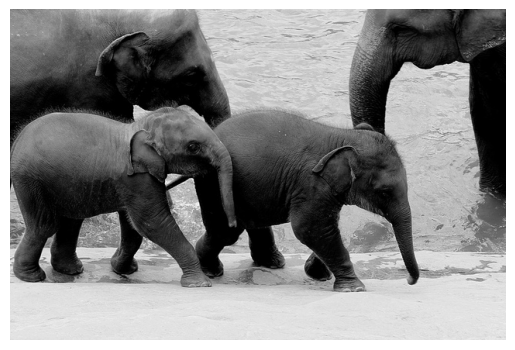

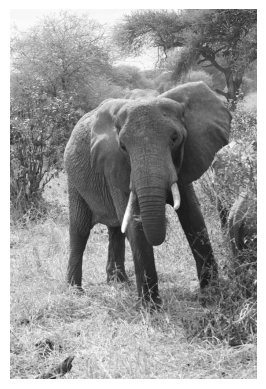

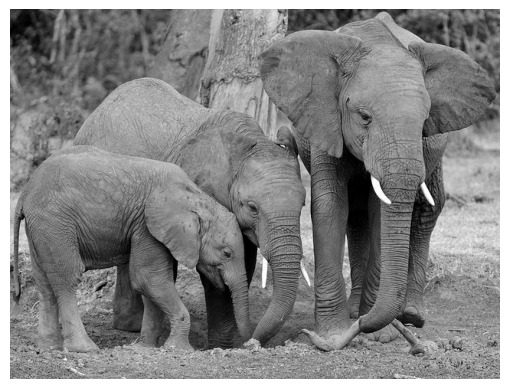

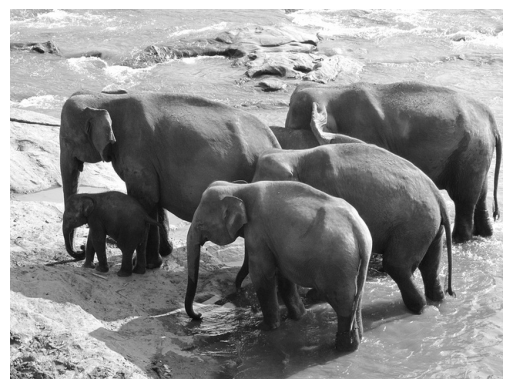

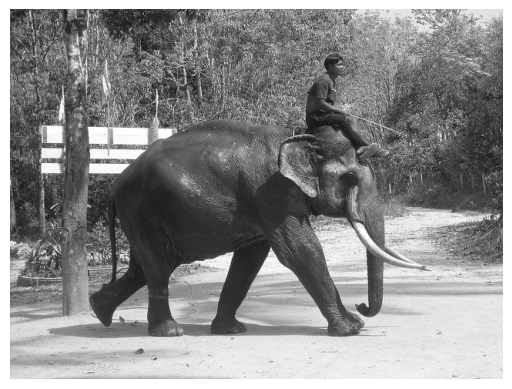

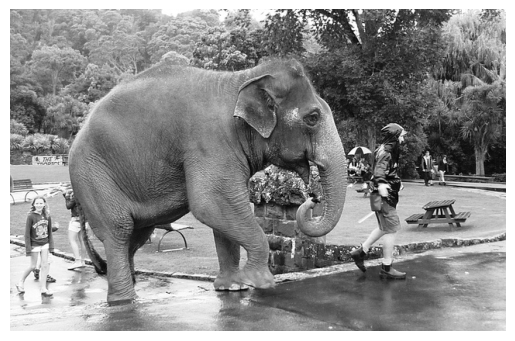

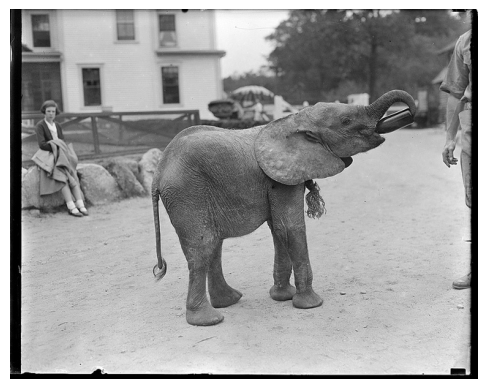

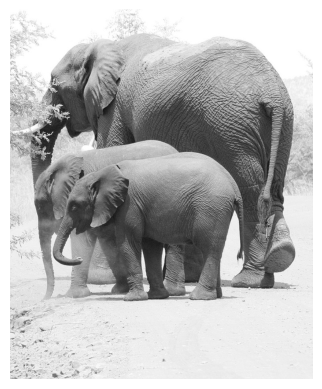

In [10]:
for image in elephant_images:
  full_image_path = os.path.join(elephant_dir, image)
  elephant_img = cv2.imread(full_image_path, cv2.IMREAD_GRAYSCALE)
  plt.imshow(elephant_img, cmap="gray")
  plt.axis('off')
  plt.show()

From these 8 images we already have some important information to keep in mind:
1. We do not necessarly have only one elephant on the image.
2. If an elephant is not alone, it can be a human or another elephant or maybe even something else alongside.
3. We have baby elephants! Which means our model should be able to recognize them as well.

Now, let's visualize some rhinos:

In [11]:
rhinos_images = []
all_images = [image for image in os.listdir(elephant_dir) if image.lower().endswith(('.jpg', '.jpeg', '.png'))]
rhinos_images_list = [image for image in all_images if image.lower().startswith('rhino')]

for i in range(8):
    random_image = random.choice(rhinos_images_list)
    rhinos_images.append(random_image)
    rhinos_images_list.remove(random_image) # to avoid duplicates

print("Selected Rhinos Images:", rhinos_images)

Selected Rhinos Images: ['rhino_236.jpg', 'rhino_160.jpg', 'rhino_217.jpg', 'rhino_105.jpg', 'rhino_200.jpg', 'rhino_147.jpg', 'rhino_02.jpg', 'rhino_173.jpg']


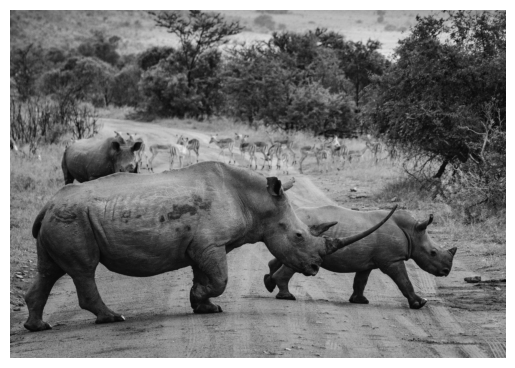

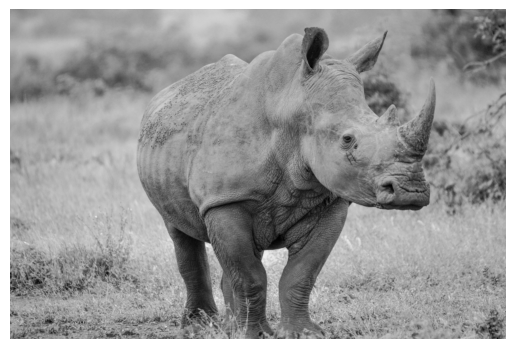

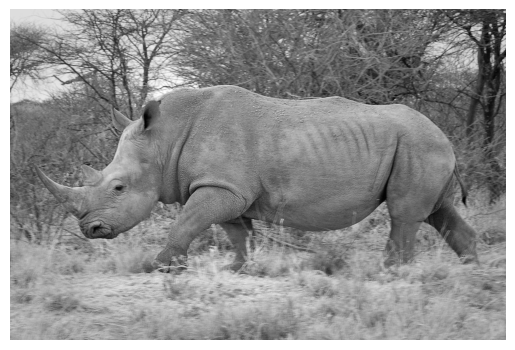

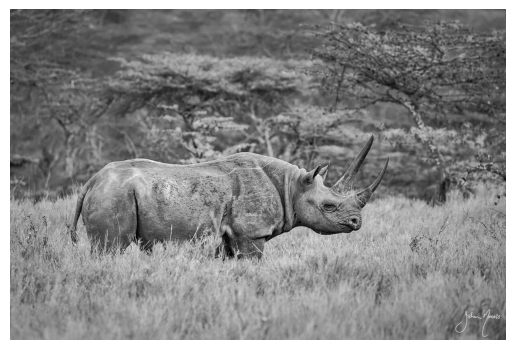

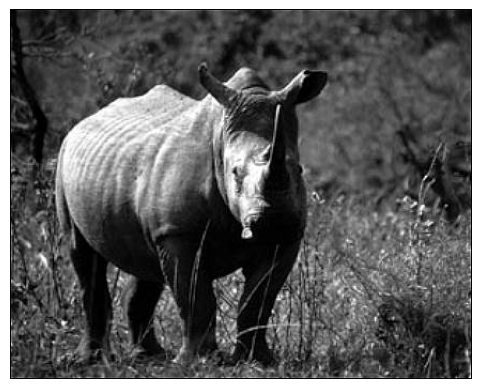

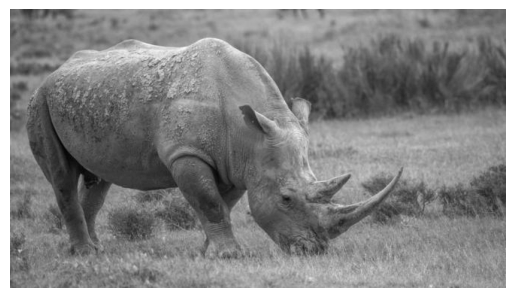

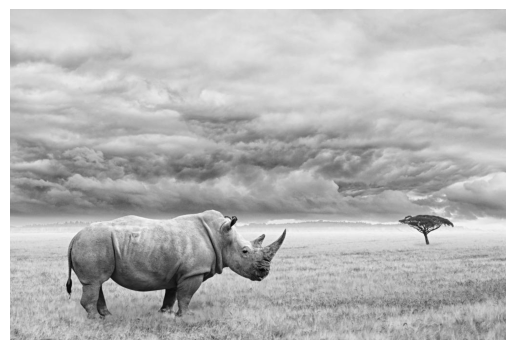

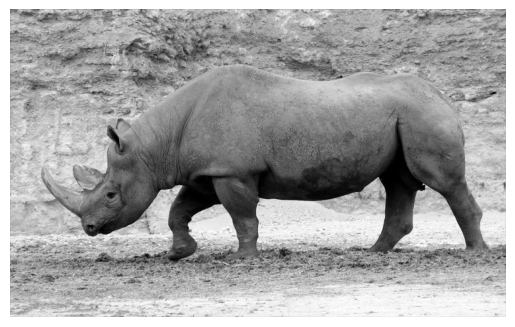

In [12]:
for image in rhinos_images:
  full_image_path = os.path.join(elephant_dir, image)
  rhinos_img = cv2.imread(full_image_path, cv2.IMREAD_GRAYSCALE)
  plt.imshow(rhinos_img, cmap="gray")
  plt.axis('off')
  plt.show()

For rhinos we also have images where there is not just one animal on the picture or it is a baby rhino. Let's see if this will impact the model's performance or not.

## Part II - YOLOv8

In this section we will implement the YOLOv8 model, which will be our base model for performance evaluation.

### A. Preprocessing

First, we need to organize our data in the proper way YOLOv8 will expect. For this we need to create a dataset folder composed of train and val subfolders for both images and labels.

Below is a function to reproduce this locally if you desire to:

In [ ]:
'''
import os
import shutil
import random

def move_files(file_list, source_dir, train_dir, val_dir, label_ext='.txt', split_ratio=0.8):
    random.shuffle(file_list)
    split_index = int(len(file_list) * split_ratio)
    train_files = file_list[:split_index]
    val_files = file_list[split_index:]

    for file in train_files:
        shutil.move(os.path.join(source_dir, file), os.path.join(train_dir, 'images', 'train', file))
        label_file = os.path.splitext(file)[0] + label_ext
        shutil.move(os.path.join(source_dir, label_file), os.path.join(train_dir, 'labels', 'train', label_file))

    for file in val_files:
        shutil.move(os.path.join(source_dir, file), os.path.join(val_dir, 'images', 'val', file))
        label_file = os.path.splitext(file)[0] + label_ext
        shutil.move(os.path.join(source_dir, label_file), os.path.join(val_dir, 'labels', 'val', label_file))

def split_dataset(source_dir, dest_dir):
    for subdir in ['images/train', 'images/val', 'labels/train', 'labels/val']:
        os.makedirs(os.path.join(dest_dir, subdir), exist_ok=True)

    all_images = [f for f in os.listdir(source_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

    elephant_images = [img for img in all_images if img.startswith('0')]
    rhino_images = [img for img in all_images if img.startswith('rhino')]

    move_files(elephant_images, source_dir, dest_dir, dest_dir)
    move_files(rhino_images, source_dir, dest_dir, dest_dir)

source_dir = './archive/elephant'
dest_dir = './archive/elephant/elephant_dataset'

split_dataset(source_dir, dest_dir)
'''

"\nimport os\nimport shutil\nimport random\n\ndef move_files(file_list, source_dir, train_dir, val_dir, label_ext='.txt', split_ratio=0.8):\n    random.shuffle(file_list)\n    split_index = int(len(file_list) * split_ratio)\n    train_files = file_list[:split_index]\n    val_files = file_list[split_index:]\n\n    for file in train_files:\n        shutil.move(os.path.join(source_dir, file), os.path.join(train_dir, 'images', 'train', file))\n        label_file = os.path.splitext(file)[0] + label_ext\n        shutil.move(os.path.join(source_dir, label_file), os.path.join(train_dir, 'labels', 'train', label_file))\n\n    for file in val_files:\n        shutil.move(os.path.join(source_dir, file), os.path.join(val_dir, 'images', 'val', file))\n        label_file = os.path.splitext(file)[0] + label_ext\n        shutil.move(os.path.join(source_dir, label_file), os.path.join(val_dir, 'labels', 'val', label_file))\n\ndef split_dataset(source_dir, dest_dir):\n    for subdir in ['images/train', 'i

Then, we also have to create a yaml file with:
- path of train and val datasets
- number of classes
- class names

Once this is done, we can start modeling!

In [3]:
from ultralytics import YOLO

yolov8_medium = YOLO("yolov8m.pt") # downloading medium version of YOLOv8

Let's get some more info about our model, so we know what we are playing with concretely:

In [4]:
print(yolov8_medium)

YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 48, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(48, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(48, 96, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(96, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(96, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(96, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(192, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(96, eps=0.001, momentum=0.03, affine=True, track_running_

In [5]:
yolov8_medium.model.info(verbose=True)

YOLOv8m summary: 295 layers, 25902640 parameters, 0 gradients


(295, 25902640, 0, 0.0)

As we can see, the model has 295 layers, most of them being convolution layers, and more than 25M parameters. More than we could ever train by ourselves on our machine.

Let's train our model on the train folder we designed in section A. Most of training parameters were picked following this [tutorial](https://docs.ultralytics.com/guides/model-training-tips/#training-on-large-datasets) from ultralytics and following [documentation](https://docs.ultralytics.com/modes/train/#usage-examples).

In [6]:
yaml_file_path = './elephant_dataset/elephant.yaml'

In [7]:
import time

start_time_YOLO = time.time()

# freeze = how many layers to freeze in context of transfer learning
# patience = how many epochs to wait if NN hits plateau
# batch=-1 means YOLO to maximize batch size by looking at GPU capacity (often 60% so pushed to 80%)
yolov8_medium.train(data=yaml_file_path, epochs=100, imgsz=640, freeze=5, patience=50, batch=0.8) 

end_time_YOLO = time.time()

Ultralytics YOLOv8.2.48  Python-3.12.4 torch-2.3.1 CUDA:0 (NVIDIA GeForce RTX 3080 Laptop GPU, 16384MiB)
engine\trainer: task=detect, mode=train, model=yolov8m.pt, data=./elephant_dataset/elephant.yaml, epochs=100, time=None, patience=50, batch=0.8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train10, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=5, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=Tru

train: Scanning C:\Users\guyet\Documents\EPITA\Image_Processing\dataset\labels\train.cache... 379 images, 300 backgrounds, 0 corrupt: 100%|██████████| 379/379 [00:00<?, ?it/s]

train: WARNING  C:\Users\guyet\Documents\EPITA\Image_Processing\dataset\images\train\rhino_33.jpg: corrupt JPEG restored and saved
train: WARNING  C:\Users\guyet\Documents\EPITA\Image_Processing\dataset\images\train\rhino_37.jpg: corrupt JPEG restored and saved



val: Scanning C:\Users\guyet\Documents\EPITA\Image_Processing\dataset\labels\val.cache... 96 images, 76 backgrounds, 0 corrupt: 100%|██████████| 96/96 [00:00<?, ?it/s]


Plotting labels to runs\detect\train10\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.000453125), 83 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\detect\train10
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      5.83G     0.7439      7.987      1.209          0        640: 100%|██████████| 14/14 [00:08<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.18it/s]

                   all         96         38      0.067      0.184     0.0585     0.0177



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      5.93G      1.007      3.284      1.424          1        640: 100%|██████████| 14/14 [00:05<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.41it/s]

                   all         96         38    0.00365      0.658    0.00402    0.00214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      5.93G      1.295      2.676      1.647          2        640: 100%|██████████| 14/14 [00:05<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.79it/s]

                   all         96         38   0.000117     0.0526   6.25e-05   1.25e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      6.37G      1.308      2.125      1.649          0        640: 100%|██████████| 14/14 [00:05<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.04it/s]

                   all         96         38   3.51e-05     0.0263   1.78e-05   8.91e-06



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      6.35G      1.306      1.741      1.627          6        640: 100%|██████████| 14/14 [00:05<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.95it/s]

                   all         96         38    0.00126      0.395    0.00109   0.000433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      6.68G       1.35      2.103       1.65          0        640: 100%|██████████| 14/14 [00:05<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.64it/s]

                   all         96         38    0.00218      0.421    0.00187   0.000573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      6.65G      1.415      1.833       1.75          3        640: 100%|██████████| 14/14 [00:05<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.54it/s]

                   all         96         38   0.000208      0.158   0.000137   2.49e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      6.65G      1.495      1.876      1.843          3        640: 100%|██████████| 14/14 [00:05<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.25it/s]

                   all         96         38   0.000208      0.158   0.000137   2.49e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      6.65G      1.442      1.911      1.791          0        640: 100%|██████████| 14/14 [00:05<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.44it/s]

                   all         96         38    0.00155        0.5    0.00127   0.000571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      6.65G       1.39      1.678      1.717          2        640: 100%|██████████| 14/14 [00:05<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.49it/s]

                   all         96         38    0.00315      0.553    0.00327    0.00159



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      6.68G      1.319      1.548      1.653          2        640: 100%|██████████| 14/14 [00:05<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.55it/s]

                   all         96         38    0.00104      0.632   0.000851   0.000425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      6.65G      1.402      1.625      1.867          1        640: 100%|██████████| 14/14 [00:05<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.62it/s]

                   all         96         38      0.152      0.316      0.108     0.0517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100       6.4G      1.255      1.448       1.66          1        640: 100%|██████████| 14/14 [00:05<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.47it/s]

                   all         96         38      0.197      0.579      0.305      0.174



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      6.39G      1.349      1.399      1.685          4        640: 100%|██████████| 14/14 [00:05<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.42it/s]

                   all         96         38      0.359      0.368      0.275       0.14



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      6.65G      1.103      1.469      1.452          0        640: 100%|██████████| 14/14 [00:05<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.48it/s]

                   all         96         38     0.0168      0.553     0.0123    0.00626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      6.44G      1.117      1.386      1.524          4        640: 100%|██████████| 14/14 [00:05<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.42it/s]

                   all         96         38      0.292      0.395      0.281      0.132



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      6.65G      1.075      1.362       1.42          0        640: 100%|██████████| 14/14 [00:05<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.33it/s]

                   all         96         38      0.398      0.553       0.46      0.256



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      6.68G      1.021      1.188      1.401          0        640: 100%|██████████| 14/14 [00:05<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.57it/s]

                   all         96         38      0.763      0.595      0.689      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      6.65G      1.041      1.195      1.391          0        640: 100%|██████████| 14/14 [00:05<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.58it/s]

                   all         96         38      0.628        0.5      0.595      0.373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      6.65G      1.055      1.136      1.443          2        640: 100%|██████████| 14/14 [00:05<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.57it/s]

                   all         96         38      0.637      0.658      0.653      0.365



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      6.36G      1.011      1.386      1.373          0        640: 100%|██████████| 14/14 [00:05<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.45it/s]

                   all         96         38      0.817      0.632      0.759      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      6.65G     0.9553      1.087      1.348          1        640: 100%|██████████| 14/14 [00:05<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.44it/s]

                   all         96         38      0.823      0.684      0.775      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      6.65G      1.099      1.212      1.466          4        640: 100%|██████████| 14/14 [00:05<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.61it/s]

                   all         96         38      0.659      0.711      0.756        0.4



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      6.65G     0.9679      1.132      1.311          0        640: 100%|██████████| 14/14 [00:05<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.57it/s]

                   all         96         38      0.617      0.526      0.596       0.34



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      6.65G       1.04       1.16      1.364          6        640: 100%|██████████| 14/14 [00:05<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.56it/s]

                   all         96         38        0.6      0.658      0.653      0.421



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      6.65G      1.077      1.095      1.468          1        640: 100%|██████████| 14/14 [00:05<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.55it/s]

                   all         96         38       0.38      0.711      0.465      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      6.64G     0.9805      1.029      1.361          1        640: 100%|██████████| 14/14 [00:05<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.63it/s]

                   all         96         38      0.694      0.763      0.778      0.427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      6.36G     0.9143     0.9086      1.318          2        640: 100%|██████████| 14/14 [00:05<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.54it/s]

                   all         96         38      0.607      0.691      0.756      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      6.65G       0.89     0.9404      1.267          1        640: 100%|██████████| 14/14 [00:05<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.46it/s]

                   all         96         38      0.749      0.785      0.824      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      6.64G     0.8518     0.9569      1.213          0        640: 100%|██████████| 14/14 [00:05<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.66it/s]

                   all         96         38       0.66      0.868       0.83       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      6.65G     0.8295     0.8229      1.259          3        640: 100%|██████████| 14/14 [00:05<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.57it/s]

                   all         96         38      0.804      0.754      0.804      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      6.65G     0.8101     0.8926      1.195          0        640: 100%|██████████| 14/14 [00:05<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.30it/s]

                   all         96         38      0.583      0.763      0.697      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      6.67G     0.8491     0.9041      1.233          2        640: 100%|██████████| 14/14 [00:05<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.38it/s]

                   all         96         38      0.701      0.763      0.813      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      6.65G     0.7395     0.7767      1.206          3        640: 100%|██████████| 14/14 [00:05<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.71it/s]

                   all         96         38      0.713      0.684      0.784      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      6.35G     0.8471     0.8069      1.243          1        640: 100%|██████████| 14/14 [00:05<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.63it/s]

                   all         96         38      0.841      0.632      0.814      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      6.65G     0.8078      1.608      1.211          0        640: 100%|██████████| 14/14 [00:05<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.66it/s]

                   all         96         38      0.618      0.684      0.711      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      6.65G     0.8477     0.7869      1.286          1        640: 100%|██████████| 14/14 [00:05<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.60it/s]

                   all         96         38      0.866      0.681      0.785      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      6.68G     0.7504     0.7615      1.142          0        640: 100%|██████████| 14/14 [00:05<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.55it/s]

                   all         96         38      0.835      0.802       0.87       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      6.64G     0.8589     0.7938      1.284          4        640: 100%|██████████| 14/14 [00:05<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.59it/s]

                   all         96         38      0.902      0.842       0.91      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      6.38G     0.7559      0.785      1.193          7        640: 100%|██████████| 14/14 [00:05<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.57it/s]

                   all         96         38      0.832      0.816       0.88      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      6.38G     0.7702     0.8355      1.192          0        640: 100%|██████████| 14/14 [00:05<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.72it/s]

                   all         96         38      0.825      0.746      0.824      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      6.68G     0.7105     0.7355       1.08          0        640: 100%|██████████| 14/14 [00:05<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.72it/s]

                   all         96         38      0.726      0.839      0.847      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      6.65G     0.8257     0.8645      1.264          1        640: 100%|██████████| 14/14 [00:05<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.69it/s]

                   all         96         38      0.748      0.861      0.864      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      6.36G     0.7653      0.791      1.221          2        640: 100%|██████████| 14/14 [00:06<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.65it/s]

                   all         96         38      0.712      0.763      0.797      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      6.65G     0.7155     0.8082       1.18          2        640: 100%|██████████| 14/14 [00:05<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.77it/s]

                   all         96         38      0.641      0.789       0.78      0.444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      6.65G     0.8166     0.7651       1.27          1        640: 100%|██████████| 14/14 [00:05<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.63it/s]

                   all         96         38      0.832      0.868      0.912      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      6.65G     0.8248     0.7845      1.281          2        640: 100%|██████████| 14/14 [00:05<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.54it/s]

                   all         96         38        0.8      0.738      0.875       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      6.35G     0.7638     0.8487      1.246          1        640: 100%|██████████| 14/14 [00:05<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.85it/s]

                   all         96         38      0.796      0.868        0.9      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      6.65G     0.6977     0.7479      1.089          0        640: 100%|██████████| 14/14 [00:05<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.81it/s]

                   all         96         38      0.755       0.81      0.849      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      6.65G     0.7194      0.764      1.203          2        640: 100%|██████████| 14/14 [00:06<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.57it/s]

                   all         96         38       0.83      0.642      0.761      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      6.65G     0.7384     0.7222      1.231          1        640: 100%|██████████| 14/14 [00:05<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.74it/s]

                   all         96         38      0.808      0.777      0.862      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      6.68G     0.6279     0.9496      1.065          0        640: 100%|██████████| 14/14 [00:05<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.53it/s]

                   all         96         38      0.791      0.974      0.871       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      6.68G     0.6296     0.7123      1.067          0        640: 100%|██████████| 14/14 [00:05<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.62it/s]

                   all         96         38      0.771      0.895      0.872      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      6.65G     0.6283     0.6194      1.107          1        640: 100%|██████████| 14/14 [00:05<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.43it/s]

                   all         96         38      0.837      0.811      0.918      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      6.65G     0.6443      0.644      1.111          1        640: 100%|██████████| 14/14 [00:05<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.71it/s]

                   all         96         38      0.831      0.632      0.771      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      6.67G     0.6236     0.7276      1.045          0        640: 100%|██████████| 14/14 [00:05<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.61it/s]

                   all         96         38      0.733      0.796      0.842      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      6.36G     0.6092     0.5958      1.039          0        640: 100%|██████████| 14/14 [00:06<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.49it/s]

                   all         96         38      0.876      0.789      0.918      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      6.35G     0.6195     0.5752      1.118          2        640: 100%|██████████| 14/14 [00:11<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.55it/s]

                   all         96         38      0.764      0.842      0.888      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      6.65G     0.6529     0.6605      1.152          5        640: 100%|██████████| 14/14 [00:11<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.50it/s]

                   all         96         38      0.849      0.888      0.927      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      6.68G      0.586     0.5954      1.034          0        640: 100%|██████████| 14/14 [00:08<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.62it/s]

                   all         96         38      0.889      0.841      0.933      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      6.65G     0.6432      0.602      1.125          3        640: 100%|██████████| 14/14 [00:06<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.66it/s]

                   all         96         38      0.844      0.921      0.948      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      6.65G     0.6164     0.6294      1.111          6        640: 100%|██████████| 14/14 [00:05<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.71it/s]

                   all         96         38      0.856      0.939      0.949      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      6.35G      0.623     0.6088      1.136          1        640: 100%|██████████| 14/14 [00:05<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.70it/s]

                   all         96         38      0.942      0.858      0.944       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      6.65G     0.6267     0.6116      1.122          3        640: 100%|██████████| 14/14 [00:05<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.64it/s]

                   all         96         38      0.822      0.868      0.901      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      6.39G     0.5777     0.6248      1.049          1        640: 100%|██████████| 14/14 [00:05<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.59it/s]

                   all         96         38      0.833      0.919      0.894      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      6.68G     0.6923     0.7762      1.168          4        640: 100%|██████████| 14/14 [00:05<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.69it/s]

                   all         96         38      0.845      0.921      0.901      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      6.65G     0.5646     0.5685      1.004          0        640: 100%|██████████| 14/14 [00:05<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.68it/s]

                   all         96         38       0.88      0.842      0.921      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      6.65G     0.5834     0.5642      1.078          1        640: 100%|██████████| 14/14 [00:05<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.54it/s]

                   all         96         38      0.998      0.921      0.976       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      6.65G     0.5645     0.5773      1.056          4        640: 100%|██████████| 14/14 [00:05<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.74it/s]

                   all         96         38      0.767      0.864       0.89      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      6.68G     0.5786     0.6388      1.062          3        640: 100%|██████████| 14/14 [00:05<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.73it/s]

                   all         96         38      0.807      0.879      0.917      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      6.38G     0.5492     0.5315      1.084          2        640: 100%|██████████| 14/14 [00:05<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.75it/s]

                   all         96         38       0.83      0.899      0.911      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      6.65G      0.527     0.5555      1.083          2        640: 100%|██████████| 14/14 [00:05<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.67it/s]

                   all         96         38      0.767      0.895       0.84      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      6.68G     0.4815     0.5091     0.9712          0        640: 100%|██████████| 14/14 [00:05<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.67it/s]

                   all         96         38       0.85      0.789      0.862      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      6.64G     0.4929     0.4986     0.9589          0        640: 100%|██████████| 14/14 [00:05<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.83it/s]

                   all         96         38      0.787      0.875      0.848      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      6.74G     0.6269     0.6165       1.11          2        640: 100%|██████████| 14/14 [00:05<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.61it/s]

                   all         96         38      0.764      0.921      0.886      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      6.65G     0.4924     0.4899      1.029          2        640: 100%|██████████| 14/14 [00:05<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.60it/s]

                   all         96         38      0.813      0.895      0.886      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      6.65G     0.4379     0.4363     0.9366          0        640: 100%|██████████| 14/14 [00:05<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.78it/s]

                   all         96         38       0.85      0.894      0.923      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      6.35G     0.5605     0.5614      1.065          2        640: 100%|██████████| 14/14 [00:05<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.74it/s]

                   all         96         38      0.792      0.868      0.918      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      6.36G     0.4914     0.5846      1.037          2        640: 100%|██████████| 14/14 [00:05<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.80it/s]

                   all         96         38      0.798      0.868      0.931      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      6.35G     0.4395     0.4563     0.9539          0        640: 100%|██████████| 14/14 [00:05<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.72it/s]

                   all         96         38      0.802      0.895      0.918      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      6.65G     0.5136     0.5364      1.059          1        640: 100%|██████████| 14/14 [00:05<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.85it/s]

                   all         96         38       0.86      0.968      0.932      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      6.65G     0.5352     0.5146      1.037          2        640: 100%|██████████| 14/14 [00:05<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.71it/s]

                   all         96         38      0.825      0.921      0.922       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      6.64G     0.4808     0.5226       1.03          7        640: 100%|██████████| 14/14 [00:05<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.82it/s]

                   all         96         38      0.872      0.893      0.927      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      6.38G     0.5027     0.4865      1.023          6        640: 100%|██████████| 14/14 [00:05<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.66it/s]

                   all         96         38      0.768      0.895      0.897      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      6.68G     0.4815     0.4734      1.006          1        640: 100%|██████████| 14/14 [00:06<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.72it/s]

                   all         96         38      0.788      0.895      0.898      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      6.65G     0.4755     0.4786      1.046          1        640: 100%|██████████| 14/14 [00:06<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.48it/s]

                   all         96         38      0.836      0.942      0.927       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      6.37G     0.4655     0.4554      1.001          3        640: 100%|██████████| 14/14 [00:06<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.57it/s]

                   all         96         38      0.926      0.868      0.967      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      6.36G     0.4429     0.4599     0.9978          2        640: 100%|██████████| 14/14 [00:06<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.60it/s]

                   all         96         38      0.858      0.974      0.961      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      6.66G     0.4415     0.4506     0.9847          1        640: 100%|██████████| 14/14 [00:06<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.61it/s]

                   all         96         38      0.807      0.947      0.927      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100       6.4G     0.4694     0.4619     0.9944          1        640: 100%|██████████| 14/14 [00:06<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.51it/s]

                   all         96         38      0.835      0.895      0.908      0.677


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      6.65G     0.5537     0.6159      1.061          1        640: 100%|██████████| 14/14 [00:08<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.87it/s]

                   all         96         38      0.832      0.912      0.922      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      6.65G       0.37     0.3765     0.8709          0        640: 100%|██████████| 14/14 [00:05<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.82it/s]

                   all         96         38      0.861      0.895      0.913      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      6.35G     0.3773     0.3589     0.8792          0        640: 100%|██████████| 14/14 [00:05<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.77it/s]

                   all         96         38      0.789      0.921      0.901      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      6.65G     0.3489     0.3223     0.8602          0        640: 100%|██████████| 14/14 [00:05<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.77it/s]

                   all         96         38      0.772      0.947      0.908        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      6.35G     0.3708     0.3668     0.9485          2        640: 100%|██████████| 14/14 [00:05<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.75it/s]

                   all         96         38      0.784      0.895       0.91      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      6.65G     0.3752     0.5891     0.9276          1        640: 100%|██████████| 14/14 [00:05<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.78it/s]

                   all         96         38      0.819      0.895      0.916      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      6.65G     0.3369     0.3181     0.8407          0        640: 100%|██████████| 14/14 [00:05<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.83it/s]

                   all         96         38      0.753      0.962       0.91      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      6.35G     0.3576     0.3485      0.902          0        640: 100%|██████████| 14/14 [00:05<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.65it/s]

                   all         96         38      0.844      0.816      0.907      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      6.68G     0.3456     0.3397     0.8882          2        640: 100%|██████████| 14/14 [00:05<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.73it/s]

                   all         96         38      0.829      0.893      0.906      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      6.65G     0.3535     0.3387     0.8679          0        640: 100%|██████████| 14/14 [00:05<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.61it/s]

                   all         96         38      0.831      0.904       0.91       0.67



100 epochs completed in 0.234 hours.
Optimizer stripped from runs\detect\train10\weights\last.pt, 52.0MB
Optimizer stripped from runs\detect\train10\weights\best.pt, 52.0MB

Validating runs\detect\train10\weights\best.pt...
Ultralytics YOLOv8.2.48  Python-3.12.4 torch-2.3.1 CUDA:0 (NVIDIA GeForce RTX 3080 Laptop GPU, 16384MiB)
Model summary (fused): 218 layers, 25840918 parameters, 0 gradients


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.06it/s]


                   all         96         38      0.944      0.885      0.968      0.724
              elephant         20         38      0.944      0.885      0.968      0.724
Speed: 0.5ms preprocess, 6.7ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to runs\detect\train10


In [10]:
elapsed_time = end_time_YOLO - start_time_YOLO

minutes = int(elapsed_time // 60)
seconds = int(elapsed_time % 60)

print(f"Training time: {minutes} minutes and {seconds} seconds")

Training time: 14 minutes and 57 seconds


In [11]:
results = yolov8_medium.val()

Ultralytics YOLOv8.2.48  Python-3.12.4 torch-2.3.1 CUDA:0 (NVIDIA GeForce RTX 3080 Laptop GPU, 16384MiB)


val: Scanning C:\Users\guyet\Documents\EPITA\Image_Processing\dataset\labels\val.cache... 96 images, 76 backgrounds, 0 corrupt: 100%|██████████| 96/96 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:09<00:00,  2.28s/it]


                   all         96         38      0.928      0.868      0.966       0.72
              elephant         20         38      0.928      0.868      0.966       0.72
Speed: 1.2ms preprocess, 11.4ms inference, 0.0ms loss, 1.8ms postprocess per image
Results saved to runs\detect\train103


In [12]:
print("Validation Metrics:")
print(f"Precision: {results.box.p.mean():.4f}")
print(f"Recall: {results.box.r.mean():.4f}")
print(f"F1 Score: {results.box.f1.mean():.4f}")

Validation Metrics:
Precision: 0.9283
Recall: 0.8684
F1 Score: 0.8974


As we can see our model has very good performance with a precision of 92% and a recall of 86% (which means we are not confusing too often elephanmts with other items on the picture). Moreover, training took us 14 minutes "only" by freezing the first 10 layers and training only the rest of the model, which is quite acceptable (however our setting is a GPU with 16GB RAM and we afford to allocate 13GB which obviously speed up the process).

YOLO creates a "run" folder during learning where it saves key metrics along the learning process. Let's try to plot the confusion matrix of the validation to get a better understanding of our model.

In [30]:
metrics_folder = './runs/detect/train103/'
confusion_matrix = 'confusion_matrix.png'
val_batch_with_error = 'val_batch1_pred.jpg'

Image shape: (2250, 3000, 3)
Image dtype: uint8


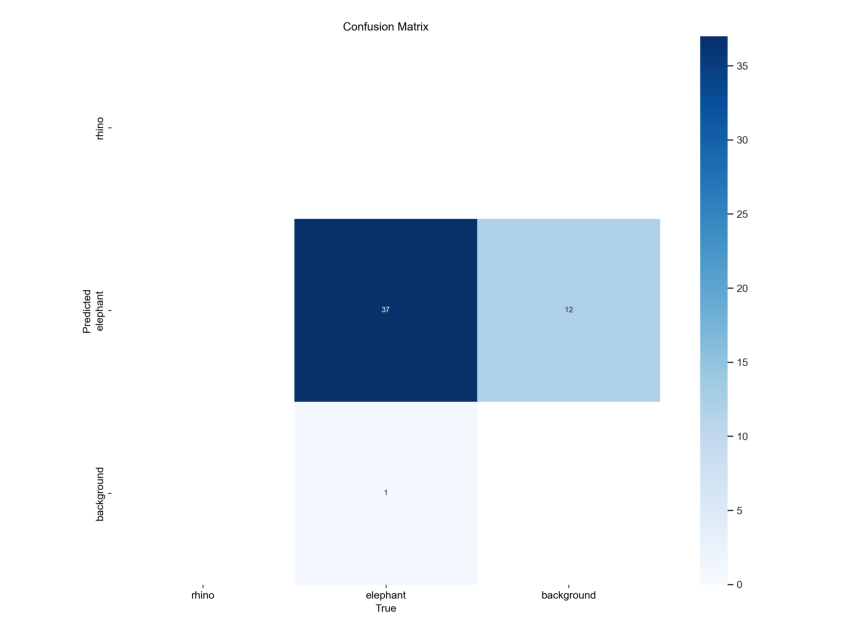

In [28]:
%matplotlib inline

conf_matrix_path = os.path.join(metrics_folder, confusion_matrix)
conf_matrix_img = cv2.imread(conf_matrix_path)

if conf_matrix_img is not None:
    print(f"Image shape: {conf_matrix_img.shape}")
    print(f"Image dtype: {conf_matrix_img.dtype}")
    
    conf_matrix_img_rgb = cv2.cvtColor(conf_matrix_img, cv2.COLOR_BGR2RGB)
    
    plt.figure(figsize=(15, 8))
    plt.imshow(conf_matrix_img_rgb)
    plt.axis('off')
    plt.show()
else:
    print(f"Failed to read the image at {conf_matrix_path}")

Numbers are pretty reassuring here: out of 50 pictures for validation, the model has a precision of 97% and a recall of 75%, confusion essentially elephants with the background. Here is an image to illustrate this:

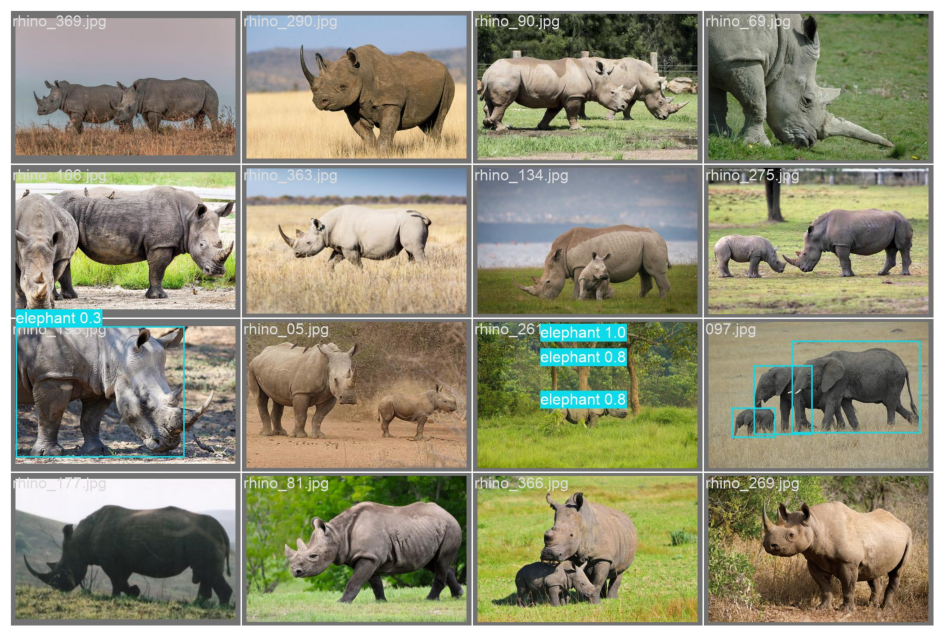

In [31]:
error_path = os.path.join(metrics_folder, val_batch_with_error)
error_img = cv2.imread(error_path)

if error_img is not None:

    error_img_rgb = cv2.cvtColor(error_img, cv2.COLOR_BGR2RGB)
    
    plt.figure(figsize=(15, 8))
    plt.imshow(error_img_rgb)
    plt.axis('off')
    plt.show()
else:
    print(f"Failed to read the image at {error_path}")

The model saw 3 elephants on the picture rhino_261 due to the rhino and the adjacent trees. Here in our case this is not a dramatic output but I think this is a good example of how it is important to review model results, as it shows the error the model can make and the impact it might have, especially when we try to detect more important items on a picture.

Finally, we can plot the Precision-Recall curve:

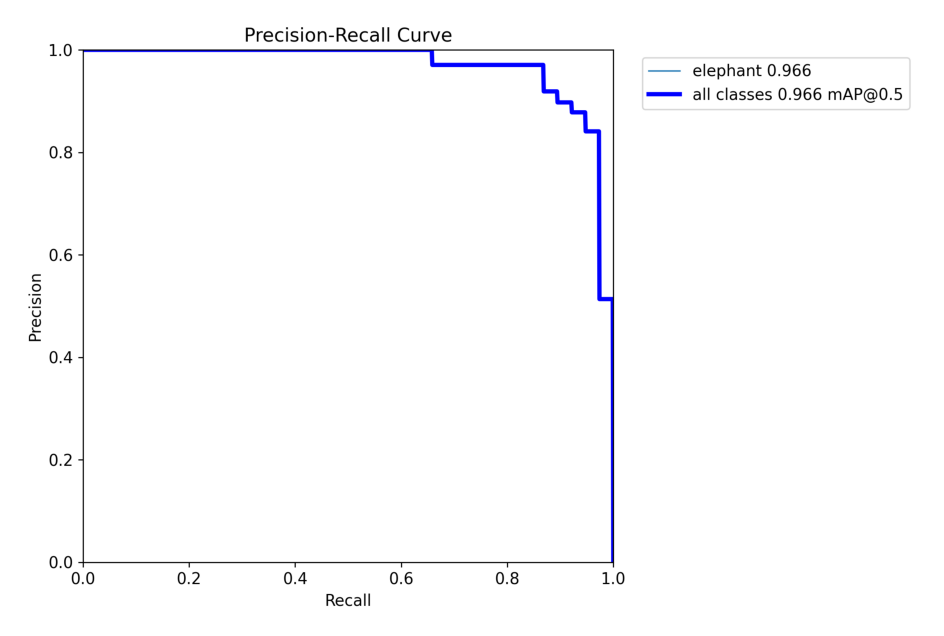

In [36]:
precision_recall_curve = 'PR_curve.png'

PR_path = os.path.join(metrics_folder, precision_recall_curve)
PR_img = cv2.imread(PR_path)

if error_img is not None:

    PR_img = cv2.cvtColor(PR_img, cv2.COLOR_BGR2RGB)
    
    plt.figure(figsize=(15, 8))
    plt.imshow(PR_img)
    plt.axis('off')
    plt.show()
else:
    print(f"Failed to read the image at {PR_img}")

From this graph it is clear that if we want tio maximize the precision (being able to both recognize when no elephant is on the picture and detect it when it is), we have to let some False Negative come in. It seems we have a best trade off around 0.90-0.95 precision and 0.80-0.85 recall. Which makes sense with our results from before.

## Part III - Real Time Detection Transformer (RT-DETR)

In this last section of the notebook we will explore another model deployed by the Ultralytics library: RTDETR. 

RTDETR is leveraging Transformers architecture to apply the attention mechanism from NLP to images: in the model architecture, the transformer backbone processes the input image and extracts hierarchical features through multiple layers of self-attention and feed-forward layers. The transformer input is the CNN output (i.e. the feature map).

The model has been developped by Baidu and more details are available [here](https://docs.ultralytics.com/models/rtdetr/). When doing some research I found out Yan Zhao et al. published in 2023 a [paper](https://arxiv.org/abs/2304.08069) simply called... *DETRs Beat YOLOs on Real-time Object Detection* introducing RT-DETR. Obviously, it captured my attention, even though I am not a big fan of such self-marketing methods.

### A. Model Definition

As usual we will load and check the basic informations of our model. The model has two versions: "L" and "X" (large and extra-large I am guessing?), so I decided to try the smallest of the two as it should already be good enough for our use case.

In [1]:
from ultralytics import RTDETR

RTDETR_model = RTDETR('rtdetr-l.pt')

RTDETR_model.info()

rt-detr-l summary: 673 layers, 32970476 parameters, 0 gradients


(673, 32970476, 0, 0.0)

### B. Training

The good news is we can reuse what we have already prepared when training YOLOv8, so we can straight away jump to training phase. As this model is more complex than YOLO I decided to train for 50 epochs, and keep a memory allocation of my GPU set to 80%. First 5 layers were also frozen.

Let's see what it outputs!

In [7]:
import time

yaml_file_path = './elephant_dataset/elephant.yaml'
nb_epochs=50

RTDETR_start_time = time.time()

RTDETR_model.train(data=yaml_file_path, epochs=nb_epochs, freeze=5, batch=0.8)

RTDETR_end_time = time.time()

RTDETR_training_time = RTDETR_end_time - RTDETR_start_time
minutes = int(RTDETR_training_time) // 60
secondes = int(RTDETR_training_time) % 60

Ultralytics YOLOv8.2.48  Python-3.12.3 torch-2.3.1 CUDA:0 (NVIDIA GeForce RTX 3080 Laptop GPU, 16384MiB)
engine\trainer: task=detect, mode=train, model=rtdetr-l.pt, data=./elephant_dataset/elephant.yaml, epochs=50, time=None, patience=100, batch=0.8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train144, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=5, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=T

train: Scanning C:\Users\guyet\Documents\EPITA\Image_Processing\dataset\labels\train.cache... 379 images, 300 backgrounds, 0 corrupt: 100%|██████████| 379/379 [00:00<?, ?it/s]

train: WARNING  C:\Users\guyet\Documents\EPITA\Image_Processing\dataset\images\train\rhino_33.jpg: corrupt JPEG restored and saved
train: WARNING  C:\Users\guyet\Documents\EPITA\Image_Processing\dataset\images\train\rhino_37.jpg: corrupt JPEG restored and saved



val: Scanning C:\Users\guyet\Documents\EPITA\Image_Processing\dataset\labels\val.cache... 96 images, 76 backgrounds, 0 corrupt: 100%|██████████| 96/96 [00:00<?, ?it/s]


Plotting labels to runs\detect\train144\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 143 weight(decay=0.0), 206 weight(decay=0.0005), 226 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\detect\train144
Starting training for 50 epochs...

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/24 [00:00<?, ?it/s]c:\Users\guyet\anaconda3\envs\deepl\Lib\site-packages\torch\autograd\graph.py:744: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\Context.cpp:87.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
       1/50      10.5G     0.5034      1.286     0.4693          4        640: 100%|██████████| 24/24 [00:26<00:00,  1.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.51it/s]

                   all         96         38      0.128      0.105     0.0727     0.0393



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/24 [00:00<?, ?it/s]c:\Users\guyet\anaconda3\envs\deepl\Lib\site-packages\torch\autograd\graph.py:744: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\Context.cpp:87.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
       2/50      10.4G     0.5596      1.183     0.5627          8        640: 100%|██████████| 24/24 [00:22<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.51it/s]

                   all         96         38     0.0384      0.526     0.0309     0.0152



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/24 [00:00<?, ?it/s]c:\Users\guyet\anaconda3\envs\deepl\Lib\site-packages\torch\autograd\graph.py:744: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\Context.cpp:87.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
       3/50      10.5G     0.4646      1.276     0.4383          6        640: 100%|██████████| 24/24 [00:24<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.51it/s]

                   all         96         38      0.325      0.237      0.207     0.0885



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/24 [00:00<?, ?it/s]c:\Users\guyet\anaconda3\envs\deepl\Lib\site-packages\torch\autograd\graph.py:744: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\Context.cpp:87.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
       4/50      10.4G     0.5661      1.397     0.5796          9        640: 100%|██████████| 24/24 [00:24<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.49it/s]

                   all         96         38      0.112      0.342      0.152     0.0717



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/24 [00:00<?, ?it/s]c:\Users\guyet\anaconda3\envs\deepl\Lib\site-packages\torch\autograd\graph.py:744: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\Context.cpp:87.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
       5/50      10.4G     0.5022      1.248     0.5076          7        640: 100%|██████████| 24/24 [00:24<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.50it/s]

                   all         96         38      0.318      0.395      0.243      0.105



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/24 [00:00<?, ?it/s]c:\Users\guyet\anaconda3\envs\deepl\Lib\site-packages\torch\autograd\graph.py:744: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\Context.cpp:87.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
       6/50      10.5G     0.4907      1.237     0.4746          7        640: 100%|██████████| 24/24 [00:24<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.51it/s]

                   all         96         38       0.23      0.289      0.181     0.0727



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/24 [00:00<?, ?it/s]c:\Users\guyet\anaconda3\envs\deepl\Lib\site-packages\torch\autograd\graph.py:744: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\Context.cpp:87.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
       7/50      10.3G     0.5755      1.242     0.5313          1        640: 100%|██████████| 24/24 [00:24<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.49it/s]

                   all         96         38      0.131      0.184        0.1     0.0437



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/24 [00:00<?, ?it/s]c:\Users\guyet\anaconda3\envs\deepl\Lib\site-packages\torch\autograd\graph.py:744: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\Context.cpp:87.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
       8/50      10.5G     0.5017      1.449      0.454         12        640: 100%|██████████| 24/24 [00:24<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.46it/s]

                   all         96         38      0.266      0.316      0.236      0.156



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/24 [00:00<?, ?it/s]c:\Users\guyet\anaconda3\envs\deepl\Lib\site-packages\torch\autograd\graph.py:744: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\Context.cpp:87.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
       9/50      10.5G     0.4674        1.3     0.4375          6        640: 100%|██████████| 24/24 [00:23<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.50it/s]

                   all         96         38      0.215      0.184        0.1     0.0589



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/24 [00:00<?, ?it/s]c:\Users\guyet\anaconda3\envs\deepl\Lib\site-packages\torch\autograd\graph.py:744: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\Context.cpp:87.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
      10/50      10.4G     0.4513      1.424     0.4222         13        640: 100%|██████████| 24/24 [00:25<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.46it/s]

                   all         96         38       0.34      0.421      0.309      0.187



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/24 [00:00<?, ?it/s]c:\Users\guyet\anaconda3\envs\deepl\Lib\site-packages\torch\autograd\graph.py:744: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\Context.cpp:87.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
      11/50      10.5G     0.4307      1.311     0.3831          6        640: 100%|██████████| 24/24 [00:25<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.48it/s]

                   all         96         38      0.336      0.263      0.302      0.146



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/24 [00:00<?, ?it/s]c:\Users\guyet\anaconda3\envs\deepl\Lib\site-packages\torch\autograd\graph.py:744: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\Context.cpp:87.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
      12/50      10.5G     0.3515      1.473     0.3215         10        640: 100%|██████████| 24/24 [00:25<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.47it/s]

                   all         96         38      0.382      0.316      0.254      0.129



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/24 [00:00<?, ?it/s]c:\Users\guyet\anaconda3\envs\deepl\Lib\site-packages\torch\autograd\graph.py:744: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\Context.cpp:87.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
      13/50      10.5G      0.386      1.335     0.3683         17        640: 100%|██████████| 24/24 [00:25<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.47it/s]

                   all         96         38      0.266      0.514      0.332      0.179



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/24 [00:00<?, ?it/s]c:\Users\guyet\anaconda3\envs\deepl\Lib\site-packages\torch\autograd\graph.py:744: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\Context.cpp:87.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
      14/50      10.5G     0.3775      1.267     0.3696          5        640: 100%|██████████| 24/24 [00:24<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.48it/s]

                   all         96         38      0.388      0.483      0.396      0.237



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/24 [00:00<?, ?it/s]c:\Users\guyet\anaconda3\envs\deepl\Lib\site-packages\torch\autograd\graph.py:744: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\Context.cpp:87.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
      15/50      10.5G     0.4287      1.163      0.381          9        640: 100%|██████████| 24/24 [00:24<00:00,  1.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.45it/s]

                   all         96         38      0.483      0.474      0.402      0.203



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/24 [00:00<?, ?it/s]c:\Users\guyet\anaconda3\envs\deepl\Lib\site-packages\torch\autograd\graph.py:744: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\Context.cpp:87.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
      16/50      10.5G     0.4003      1.206     0.3291         19        640: 100%|██████████| 24/24 [00:23<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.43it/s]

                   all         96         38      0.644      0.428      0.509      0.339



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/24 [00:00<?, ?it/s]c:\Users\guyet\anaconda3\envs\deepl\Lib\site-packages\torch\autograd\graph.py:744: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\Context.cpp:87.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
      17/50      10.5G     0.3953      1.099     0.3334          5        640: 100%|██████████| 24/24 [00:25<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.46it/s]

                   all         96         38      0.707      0.553      0.582      0.297



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/24 [00:00<?, ?it/s]c:\Users\guyet\anaconda3\envs\deepl\Lib\site-packages\torch\autograd\graph.py:744: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\Context.cpp:87.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
      18/50      10.4G     0.3548      1.177     0.3134         16        640: 100%|██████████| 24/24 [00:25<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.37it/s]

                   all         96         38      0.587      0.553      0.523      0.317



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/24 [00:00<?, ?it/s]c:\Users\guyet\anaconda3\envs\deepl\Lib\site-packages\torch\autograd\graph.py:744: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\Context.cpp:87.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
      19/50      10.5G     0.3738      1.244     0.3512          9        640: 100%|██████████| 24/24 [00:25<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.40it/s]

                   all         96         38      0.566      0.474      0.395      0.261



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/24 [00:00<?, ?it/s]c:\Users\guyet\anaconda3\envs\deepl\Lib\site-packages\torch\autograd\graph.py:744: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\Context.cpp:87.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
      20/50      10.5G     0.3727      1.305     0.3683          9        640: 100%|██████████| 24/24 [00:25<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.44it/s]

                   all         96         38      0.323      0.421      0.321      0.212



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/24 [00:00<?, ?it/s]c:\Users\guyet\anaconda3\envs\deepl\Lib\site-packages\torch\autograd\graph.py:744: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\Context.cpp:87.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
      21/50      10.5G     0.3385       1.18     0.3215          9        640: 100%|██████████| 24/24 [00:24<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.46it/s]

                   all         96         38      0.505      0.538      0.439      0.287



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/24 [00:00<?, ?it/s]c:\Users\guyet\anaconda3\envs\deepl\Lib\site-packages\torch\autograd\graph.py:744: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\Context.cpp:87.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
      22/50      10.3G     0.3653      1.129     0.3219         10        640: 100%|██████████| 24/24 [00:25<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.42it/s]

                   all         96         38      0.649      0.553      0.515      0.343



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/24 [00:00<?, ?it/s]c:\Users\guyet\anaconda3\envs\deepl\Lib\site-packages\torch\autograd\graph.py:744: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\Context.cpp:87.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
      23/50      10.5G      0.317      1.121     0.2981         10        640: 100%|██████████| 24/24 [00:25<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.47it/s]

                   all         96         38      0.551      0.632      0.579      0.365



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/24 [00:00<?, ?it/s]c:\Users\guyet\anaconda3\envs\deepl\Lib\site-packages\torch\autograd\graph.py:744: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\Context.cpp:87.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
      24/50      10.5G     0.3919      0.989     0.3716         15        640: 100%|██████████| 24/24 [00:23<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.59it/s]

                   all         96         38      0.546      0.474      0.489      0.311



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/24 [00:00<?, ?it/s]c:\Users\guyet\anaconda3\envs\deepl\Lib\site-packages\torch\autograd\graph.py:744: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\Context.cpp:87.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
      25/50      10.4G     0.3309       1.08     0.3237          8        640: 100%|██████████| 24/24 [00:26<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.37it/s]

                   all         96         38      0.524      0.421      0.496      0.335



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/24 [00:00<?, ?it/s]c:\Users\guyet\anaconda3\envs\deepl\Lib\site-packages\torch\autograd\graph.py:744: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\Context.cpp:87.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
      26/50      10.5G     0.3541      1.024     0.3234         14        640: 100%|██████████| 24/24 [00:27<00:00,  1.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.39it/s]

                   all         96         38      0.646        0.5      0.565      0.365



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/24 [00:00<?, ?it/s]c:\Users\guyet\anaconda3\envs\deepl\Lib\site-packages\torch\autograd\graph.py:744: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\Context.cpp:87.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
      27/50      10.5G     0.3775      1.029     0.3557          3        640: 100%|██████████| 24/24 [00:26<00:00,  1.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.42it/s]

                   all         96         38      0.846      0.576      0.667      0.474



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/24 [00:00<?, ?it/s]c:\Users\guyet\anaconda3\envs\deepl\Lib\site-packages\torch\autograd\graph.py:744: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\Context.cpp:87.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
      28/50      10.4G     0.3041      1.012     0.2933         13        640: 100%|██████████| 24/24 [00:26<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.40it/s]

                   all         96         38      0.659      0.579      0.621      0.372



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/24 [00:00<?, ?it/s]c:\Users\guyet\anaconda3\envs\deepl\Lib\site-packages\torch\autograd\graph.py:744: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\Context.cpp:87.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
      29/50      10.3G     0.3288     0.9589      0.302         13        640: 100%|██████████| 24/24 [00:26<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.45it/s]

                   all         96         38      0.591      0.632      0.615        0.4



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/24 [00:00<?, ?it/s]c:\Users\guyet\anaconda3\envs\deepl\Lib\site-packages\torch\autograd\graph.py:744: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\Context.cpp:87.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
      30/50      10.3G     0.3268     0.9265     0.3254          8        640: 100%|██████████| 24/24 [00:23<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.47it/s]

                   all         96         38      0.713       0.59      0.658      0.463



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/24 [00:00<?, ?it/s]c:\Users\guyet\anaconda3\envs\deepl\Lib\site-packages\torch\autograd\graph.py:744: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\Context.cpp:87.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
      31/50      10.5G     0.3313     0.9431     0.2892         13        640: 100%|██████████| 24/24 [00:24<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.47it/s]

                   all         96         38      0.578      0.632      0.573      0.398



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/24 [00:00<?, ?it/s]c:\Users\guyet\anaconda3\envs\deepl\Lib\site-packages\torch\autograd\graph.py:744: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\Context.cpp:87.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
      32/50      10.5G     0.3032     0.9651     0.2866          8        640: 100%|██████████| 24/24 [00:24<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.47it/s]

                   all         96         38      0.661      0.617      0.695      0.478



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/24 [00:00<?, ?it/s]c:\Users\guyet\anaconda3\envs\deepl\Lib\site-packages\torch\autograd\graph.py:744: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\Context.cpp:87.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
      33/50      10.5G     0.3166     0.9346     0.3283          7        640: 100%|██████████| 24/24 [00:25<00:00,  1.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.46it/s]

                   all         96         38      0.763      0.526      0.667      0.438



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/24 [00:00<?, ?it/s]c:\Users\guyet\anaconda3\envs\deepl\Lib\site-packages\torch\autograd\graph.py:744: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\Context.cpp:87.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
      34/50      10.5G     0.2756     0.8756     0.2809          7        640: 100%|██████████| 24/24 [00:23<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.47it/s]

                   all         96         38      0.682      0.553      0.633      0.402



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/24 [00:00<?, ?it/s]c:\Users\guyet\anaconda3\envs\deepl\Lib\site-packages\torch\autograd\graph.py:744: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\Context.cpp:87.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
      35/50      10.5G     0.2765     0.8622     0.2736         14        640: 100%|██████████| 24/24 [00:25<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.46it/s]

                   all         96         38      0.737      0.589       0.69      0.458



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/24 [00:00<?, ?it/s]c:\Users\guyet\anaconda3\envs\deepl\Lib\site-packages\torch\autograd\graph.py:744: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\Context.cpp:87.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
      36/50      10.5G      0.331     0.8796     0.3259          5        640: 100%|██████████| 24/24 [00:24<00:00,  1.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.46it/s]

                   all         96         38      0.683      0.658      0.728      0.449



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/24 [00:00<?, ?it/s]c:\Users\guyet\anaconda3\envs\deepl\Lib\site-packages\torch\autograd\graph.py:744: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\Context.cpp:87.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
      37/50      10.4G     0.3091     0.9511     0.3191          3        640: 100%|██████████| 24/24 [00:21<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.45it/s]

                   all         96         38      0.826      0.579      0.704      0.471



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/24 [00:00<?, ?it/s]c:\Users\guyet\anaconda3\envs\deepl\Lib\site-packages\torch\autograd\graph.py:744: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\Context.cpp:87.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
      38/50      10.4G     0.2923     0.8454     0.2596          9        640: 100%|██████████| 24/24 [00:24<00:00,  1.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.44it/s]

                   all         96         38      0.862      0.579      0.728      0.472



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/24 [00:00<?, ?it/s]c:\Users\guyet\anaconda3\envs\deepl\Lib\site-packages\torch\autograd\graph.py:744: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\Context.cpp:87.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
      39/50      10.5G     0.3112     0.8089     0.2747          9        640: 100%|██████████| 24/24 [00:24<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.47it/s]

                   all         96         38      0.883      0.596      0.673      0.417



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/24 [00:00<?, ?it/s]c:\Users\guyet\anaconda3\envs\deepl\Lib\site-packages\torch\autograd\graph.py:744: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\Context.cpp:87.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
      40/50      10.5G      0.304     0.8678     0.2793         15        640: 100%|██████████| 24/24 [00:24<00:00,  1.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.45it/s]

                   all         96         38      0.816      0.605      0.678       0.44


Closing dataloader mosaic

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/24 [00:00<?, ?it/s]c:\Users\guyet\anaconda3\envs\deepl\Lib\site-packages\torch\autograd\graph.py:744: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\Context.cpp:87.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
      41/50      10.5G     0.2126      1.063     0.2878          0        640: 100%|██████████| 24/24 [00:24<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.47it/s]

                   all         96         38      0.862      0.655      0.774      0.541



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/24 [00:00<?, ?it/s]c:\Users\guyet\anaconda3\envs\deepl\Lib\site-packages\torch\autograd\graph.py:744: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\Context.cpp:87.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
      42/50      10.4G     0.2132     0.7666     0.2745          0        640: 100%|██████████| 24/24 [00:22<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.46it/s]

                   all         96         38      0.754      0.727       0.79      0.535



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/24 [00:00<?, ?it/s]c:\Users\guyet\anaconda3\envs\deepl\Lib\site-packages\torch\autograd\graph.py:744: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\Context.cpp:87.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
      43/50      10.5G     0.2324     0.7068     0.2968          7        640: 100%|██████████| 24/24 [00:38<00:00,  1.59s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.24s/it]

                   all         96         38      0.819      0.716      0.811      0.557



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/24 [00:00<?, ?it/s]c:\Users\guyet\anaconda3\envs\deepl\Lib\site-packages\torch\autograd\graph.py:744: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\Context.cpp:87.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
      44/50      10.4G     0.2017     0.5439     0.2694          0        640: 100%|██████████| 24/24 [00:39<00:00,  1.64s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.24it/s]

                   all         96         38      0.765      0.684      0.759      0.539



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/24 [00:00<?, ?it/s]c:\Users\guyet\anaconda3\envs\deepl\Lib\site-packages\torch\autograd\graph.py:744: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\Context.cpp:87.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
      45/50      10.5G     0.2246     0.5512     0.2661          9        640: 100%|██████████| 24/24 [00:39<00:00,  1.66s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.18s/it]

                   all         96         38      0.771      0.605      0.764      0.549



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/24 [00:00<?, ?it/s]c:\Users\guyet\anaconda3\envs\deepl\Lib\site-packages\torch\autograd\graph.py:744: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\Context.cpp:87.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
      46/50      10.4G     0.1921     0.6362     0.2721          3        640: 100%|██████████| 24/24 [00:37<00:00,  1.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.48it/s]

                   all         96         38      0.822      0.658      0.775      0.566



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/24 [00:00<?, ?it/s]c:\Users\guyet\anaconda3\envs\deepl\Lib\site-packages\torch\autograd\graph.py:744: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\Context.cpp:87.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
      47/50      10.5G     0.2131     0.6235     0.2562          6        640: 100%|██████████| 24/24 [00:23<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.49it/s]

                   all         96         38      0.922      0.624      0.774      0.563



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/24 [00:00<?, ?it/s]c:\Users\guyet\anaconda3\envs\deepl\Lib\site-packages\torch\autograd\graph.py:744: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\Context.cpp:87.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
      48/50      10.4G     0.2007     0.6922     0.2254         10        640: 100%|██████████| 24/24 [00:24<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.47it/s]

                   all         96         38       0.86      0.658       0.77      0.578



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/24 [00:00<?, ?it/s]c:\Users\guyet\anaconda3\envs\deepl\Lib\site-packages\torch\autograd\graph.py:744: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\Context.cpp:87.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
      49/50      10.4G     0.2002      0.555     0.2543         11        640: 100%|██████████| 24/24 [00:23<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.49it/s]

                   all         96         38      0.774      0.763      0.798       0.58



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/24 [00:00<?, ?it/s]c:\Users\guyet\anaconda3\envs\deepl\Lib\site-packages\torch\autograd\graph.py:744: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\Context.cpp:87.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
      50/50      10.5G     0.1976     0.5949     0.2713          6        640: 100%|██████████| 24/24 [00:25<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.44it/s]

                   all         96         38      0.793      0.704      0.762      0.563



50 epochs completed in 0.443 hours.
Optimizer stripped from runs\detect\train144\weights\last.pt, 66.1MB
Optimizer stripped from runs\detect\train144\weights\best.pt, 66.1MB

Validating runs\detect\train144\weights\best.pt...
Ultralytics YOLOv8.2.48  Python-3.12.3 torch-2.3.1 CUDA:0 (NVIDIA GeForce RTX 3080 Laptop GPU, 16384MiB)
rt-detr-l summary: 494 layers, 31987850 parameters, 0 gradients


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.38it/s]


                   all         96         38      0.769      0.763      0.804      0.586
              elephant         20         38      0.769      0.763      0.804      0.586
Speed: 0.3ms preprocess, 15.8ms inference, 0.0ms loss, 1.7ms postprocess per image
Results saved to runs\detect\train144


In [8]:
dash_line = "-----"*15

print(dash_line)
print(f"Training time for RTDETR model is {minutes} minutes and {secondes} secondes for {nb_epochs} epochs")
print(dash_line)

---------------------------------------------------------------------------
Training time for RTDETR model is 27 minutes and 41 secondes for 50 epochs
---------------------------------------------------------------------------


### C. Results

In [9]:
results = RTDETR_model.val()

Ultralytics YOLOv8.2.48  Python-3.12.3 torch-2.3.1 CUDA:0 (NVIDIA GeForce RTX 3080 Laptop GPU, 16384MiB)


rt-detr-l summary: 494 layers, 31987850 parameters, 0 gradients


val: Scanning C:\Users\guyet\Documents\EPITA\Image_Processing\dataset\labels\val.cache... 96 images, 76 backgrounds, 0 corrupt: 100%|██████████| 96/96 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:12<00:00,  2.15s/it]


                   all         96         38      0.758      0.763      0.802      0.583
              elephant         20         38      0.758      0.763      0.802      0.583
Speed: 3.4ms preprocess, 29.8ms inference, 0.0ms loss, 0.6ms postprocess per image
Results saved to runs\detect\train1442


In [10]:
print("Validation Metrics:")
print(f"Precision: {results.box.p.mean():.4f}")
print(f"Recall: {results.box.r.mean():.4f}")
print(f"F1 Score: {results.box.f1.mean():.4f}")

Validation Metrics:
Precision: 0.7576
Recall: 0.7632
F1 Score: 0.7604


When looking at Precision and Recall we notice a gap between YOLOv8 and RT-DETR. Our YOLO model had an average score of 0.9 when RT-DETR is aroud 0.76. On top of that, the training took 27 minutes for 50 epochs when we trained for twice longer YOLO in only 14 minutes.

However, there is something I noticed when testing different epochs, so I decide to restart the kernel and this time train only for 5 epochs. As we can see below, we get a Precision of 0.83 and a recall of 0.70, with a training time of only 4 minutes. So the ratio time - performance is quite astonishing.

This seems to indicate with more epochs the model is overfitting and struggling to refine better the input-output pairs. A next step would be to use data augmentation techniaues to improve model generalization.

In [1]:
from ultralytics import RTDETR
import time

RTDETR_model = RTDETR('rtdetr-l.pt')

RTDETR_model.info()

yaml_file_path = './elephant_dataset/elephant.yaml'
nb_epochs=5

RTDETR_start_time = time.time()

RTDETR_model.train(data=yaml_file_path, epochs=nb_epochs, freeze=5, batch=0.8)

RTDETR_end_time = time.time()

RTDETR_training_time = RTDETR_end_time - RTDETR_start_time
minutes = int(RTDETR_training_time) // 60
secondes = int(RTDETR_training_time) % 60

rt-detr-l summary: 673 layers, 32970476 parameters, 0 gradients
Ultralytics YOLOv8.2.48  Python-3.12.3 torch-2.3.1 CUDA:0 (NVIDIA GeForce RTX 3080 Laptop GPU, 16384MiB)
engine\trainer: task=detect, mode=train, model=rtdetr-l.pt, data=./elephant_dataset/elephant.yaml, epochs=5, time=None, patience=100, batch=0.8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train15, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=5, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, s

c:\Users\guyet\anaconda3\envs\deepl\Lib\site-packages\h5py\__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "


Overriding model.yaml nc=80 with nc=2
WARNING  no model scale passed. Assuming scale='l'.

                   from  n    params  module                                       arguments                     
  0                  -1  1     25248  ultralytics.nn.modules.block.HGStem          [3, 32, 48]                   
  1                  -1  6    155072  ultralytics.nn.modules.block.HGBlock         [48, 48, 128, 3, 6]           
  2                  -1  1      1408  ultralytics.nn.modules.conv.DWConv           [128, 128, 3, 2, 1, False]    
  3                  -1  6    839296  ultralytics.nn.modules.block.HGBlock         [128, 96, 512, 3, 6]          
  4                  -1  1      5632  ultralytics.nn.modules.conv.DWConv           [512, 512, 3, 2, 1, False]    
  5                  -1  6   1695360  ultralytics.nn.modules.block.HGBlock         [512, 192, 1024, 5, 6, True, False]
  6                  -1  6   2055808  ultralytics.nn.modules.block.HGBlock         [1024, 192, 1024, 5, 6,

train: Scanning C:\Users\guyet\Documents\EPITA\Image_Processing\dataset\labels\train.cache... 379 images, 300 backgrounds, 0 corrupt: 100%|██████████| 379/379 [00:00<?, ?it/s]

train: WARNING  C:\Users\guyet\Documents\EPITA\Image_Processing\dataset\images\train\rhino_33.jpg: corrupt JPEG restored and saved
train: WARNING  C:\Users\guyet\Documents\EPITA\Image_Processing\dataset\images\train\rhino_37.jpg: corrupt JPEG restored and saved



val: Scanning C:\Users\guyet\Documents\EPITA\Image_Processing\dataset\labels\val.cache... 96 images, 76 backgrounds, 0 corrupt: 100%|██████████| 96/96 [00:00<?, ?it/s]


Plotting labels to runs\detect\train15\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 143 weight(decay=0.0), 206 weight(decay=0.0005), 226 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\detect\train15
Starting training for 5 epochs...

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/24 [00:00<?, ?it/s]c:\Users\guyet\anaconda3\envs\deepl\Lib\site-packages\torch\autograd\graph.py:744: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\Context.cpp:87.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
        1/5      9.81G      1.869      24.09      3.542          4        640: 100%|██████████| 24/24 [00:25<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.48it/s]

                   all         96         38     0.0534      0.132     0.0414     0.0349



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/24 [00:00<?, ?it/s]c:\Users\guyet\anaconda3\envs\deepl\Lib\site-packages\torch\autograd\graph.py:744: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\Context.cpp:87.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
        2/5      9.89G     0.8415      1.108       1.62          8        640: 100%|██████████| 24/24 [00:24<00:00,  1.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.48it/s]

                   all         96         38      0.546      0.868      0.591       0.49



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/24 [00:00<?, ?it/s]c:\Users\guyet\anaconda3\envs\deepl\Lib\site-packages\torch\autograd\graph.py:744: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\Context.cpp:87.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
        3/5      9.77G     0.3055     0.8951     0.3063          6        640: 100%|██████████| 24/24 [00:25<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.48it/s]

                   all         96         38      0.842      0.702      0.809      0.657



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/24 [00:00<?, ?it/s]c:\Users\guyet\anaconda3\envs\deepl\Lib\site-packages\torch\autograd\graph.py:744: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\Context.cpp:87.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
        4/5      9.81G     0.3059     0.9283     0.3204          9        640: 100%|██████████| 24/24 [00:23<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.48it/s]

                   all         96         38      0.829      0.711      0.769      0.572



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/24 [00:00<?, ?it/s]c:\Users\guyet\anaconda3\envs\deepl\Lib\site-packages\torch\autograd\graph.py:744: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\Context.cpp:87.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
        5/5      9.76G     0.2673     0.7271     0.2805          7        640: 100%|██████████| 24/24 [00:25<00:00,  1.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.47it/s]

                   all         96         38      0.812      0.868      0.848      0.637



5 epochs completed in 0.045 hours.
Optimizer stripped from runs\detect\train15\weights\last.pt, 66.1MB
Optimizer stripped from runs\detect\train15\weights\best.pt, 66.1MB

Validating runs\detect\train15\weights\best.pt...
Ultralytics YOLOv8.2.48  Python-3.12.3 torch-2.3.1 CUDA:0 (NVIDIA GeForce RTX 3080 Laptop GPU, 16384MiB)
rt-detr-l summary: 494 layers, 31987850 parameters, 0 gradients


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.47it/s]


                   all         96         38      0.842      0.699      0.809      0.655
              elephant         20         38      0.842      0.699      0.809      0.655
Speed: 0.2ms preprocess, 15.5ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs\detect\train15


In [2]:
dash_line = "-----"*15

print(dash_line)
print(f"Training time for RTDETR model is {minutes} minutes and {secondes} secondes for {nb_epochs} epochs")
print(dash_line)

---------------------------------------------------------------------------
Training time for RTDETR model is 3 minutes and 58 secondes for 5 epochs
---------------------------------------------------------------------------


In [4]:
results = RTDETR_model.val()

Ultralytics YOLOv8.2.48  Python-3.12.3 torch-2.3.1 CUDA:0 (NVIDIA GeForce RTX 3080 Laptop GPU, 16384MiB)
rt-detr-l summary: 494 layers, 31987850 parameters, 0 gradients


val: Scanning C:\Users\guyet\Documents\EPITA\Image_Processing\dataset\labels\val.cache... 96 images, 76 backgrounds, 0 corrupt: 100%|██████████| 96/96 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:11<00:00,  1.97s/it]


                   all         96         38      0.842      0.702       0.81      0.659
              elephant         20         38      0.842      0.702       0.81      0.659
Speed: 0.4ms preprocess, 31.4ms inference, 0.0ms loss, 0.4ms postprocess per image
Results saved to runs\detect\train152


In [5]:
print("Validation Metrics:")
print(f"Precision: {results.box.p.mean():.4f}")
print(f"Recall: {results.box.r.mean():.4f}")
print(f"F1 Score: {results.box.f1.mean():.4f}")

Validation Metrics:
Precision: 0.8422
Recall: 0.7023
F1 Score: 0.7659


Finally, let's plot the confusion matrix and some errors the model made:

In [6]:
metrics_folder = './runs/detect/train1442/'
confusion_matrix = 'confusion_matrix.png'
val_batch_with_error_1 = 'val_batch0_pred.jpg'
val_batch_with_error_2 = 'val_batch2_pred.jpg'

Image shape: (2250, 3000, 3)
Image dtype: uint8


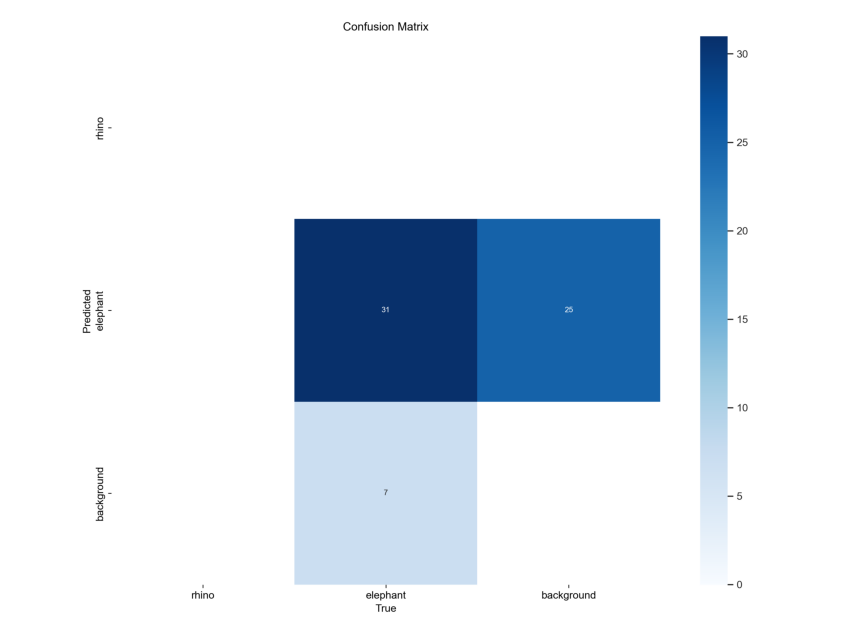

In [11]:
import matplotlib.pyplot as plt
import os
import cv2

%matplotlib inline

conf_matrix_path = os.path.join(metrics_folder, confusion_matrix)
conf_matrix_img = cv2.imread(conf_matrix_path)

if conf_matrix_img is not None:
    print(f"Image shape: {conf_matrix_img.shape}")
    print(f"Image dtype: {conf_matrix_img.dtype}")
    
    conf_matrix_img_rgb = cv2.cvtColor(conf_matrix_img, cv2.COLOR_BGR2RGB)
    
    plt.figure(figsize=(15, 8))
    plt.imshow(conf_matrix_img_rgb)
    plt.axis('off')
    plt.show()
else:
    print(f"Failed to read the image at {conf_matrix_path}")

As we can see, the DETR model is failing more often at detecting elephants than the YOLO model. Difference is mainly with the False Negatives than the False Positives. Let's plot some images below for a better view:

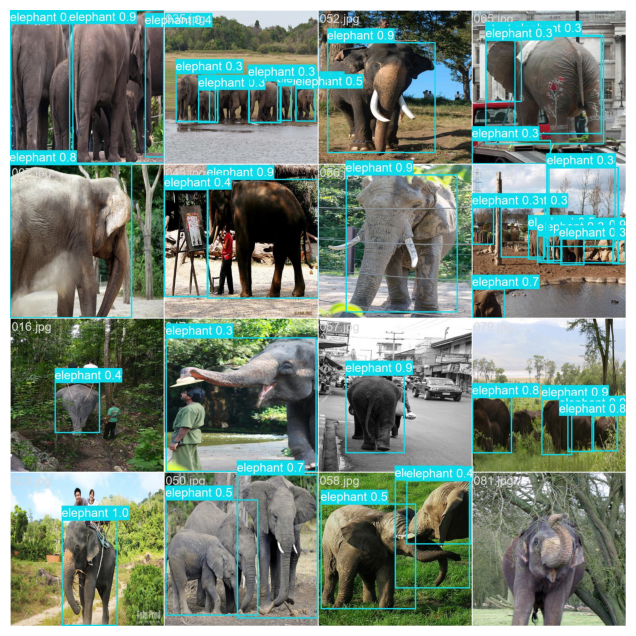

In [12]:
error_path = os.path.join(metrics_folder, val_batch_with_error_1)
error_img = cv2.imread(error_path)

if error_img is not None:

    error_img_rgb = cv2.cvtColor(error_img, cv2.COLOR_BGR2RGB)
    
    plt.figure(figsize=(15, 8))
    plt.imshow(error_img_rgb)
    plt.axis('off')
    plt.show()
else:
    print(f"Failed to read the image at {error_path}")

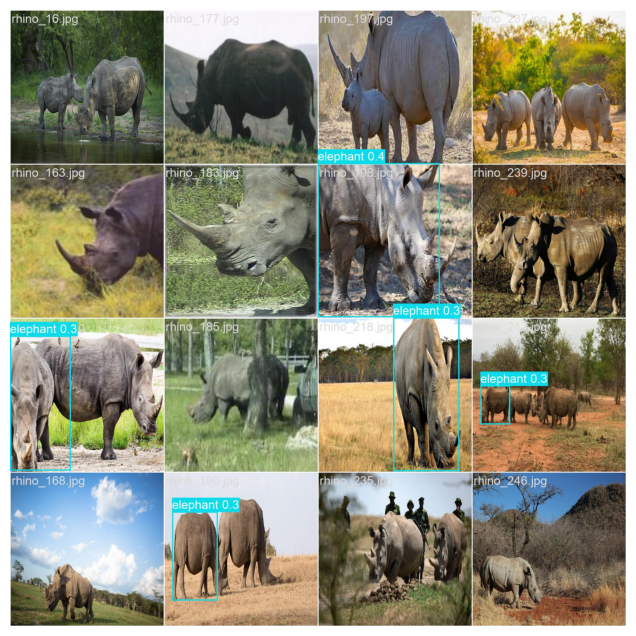

In [13]:
error_path = os.path.join(metrics_folder, val_batch_with_error_2)
error_img = cv2.imread(error_path)

if error_img is not None:

    error_img_rgb = cv2.cvtColor(error_img, cv2.COLOR_BGR2RGB)
    
    plt.figure(figsize=(15, 8))
    plt.imshow(error_img_rgb)
    plt.axis('off')
    plt.show()
else:
    print(f"Failed to read the image at {error_path}")